In [11]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

# Load Excel files
petrol_df = pd.read_excel(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Petrol_Station_Data.xlsx")
road_df = pd.read_excel(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Road.xlsx")
probe_df = pd.read_excel(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Probe_Data.xlsx")

# Convert 'geometry' column to actual geometries (assuming WKT format)
petrol_df['geometry'] = petrol_df['geometry'].apply(wkt.loads)
road_df['geometry'] = road_df['geometry'].apply(wkt.loads)
probe_df['geometry'] = probe_df['geometry'].apply(wkt.loads)

# Convert DataFrames to GeoDataFrames
petrol_gdf = gpd.GeoDataFrame(petrol_df, geometry='geometry', crs="EPSG:4326")
road_gdf = gpd.GeoDataFrame(road_df, geometry='geometry', crs="EPSG:4326")
probe_gdf = gpd.GeoDataFrame(probe_df, geometry='geometry', crs="EPSG:4326")


In [19]:
import geopandas as gpd

# Load Shapefiles
probe_gdf = gpd.read_file(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Petrol_Station\Petrol_Station\road.shp")  
petrol_gdf = gpd.read_file(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\IDN_Q223_May23_Jakarta\Probe.shp")  

# Convert from Geographic CRS (EPSG:4326) to Projected CRS (e.g., UTM or EPSG:3857)
projected_crs = "EPSG:3857"  # Web Mercator (meters)
petrol_gdf = petrol_gdf.to_crs(projected_crs)
probe_gdf = probe_gdf.to_crs(projected_crs)

# Perform Spatial Join with Correct CRS
joined_gdf = gpd.sjoin_nearest(petrol_gdf, probe_gdf, how="left", distance_col="distance")

# Convert Back to Geographic CRS (Optional)
joined_gdf = joined_gdf.to_crs("EPSG:4326")

# Save Output
joined_gdf.to_file("Petrol_with_Nearest_Road.shp")

# Display Output
print(joined_gdf.head())


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_12536\1895545247.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  joined_gdf.to_file("Petrol_with_Nearest_Road.shp")


   WEIGHT  DIS2NT                    geometry  index_right     osm_id  code  \
0       1      31  POINT (106.85278 -6.34337)        99831  563177706  5122   
1       1     172  POINT (106.85275 -6.34469)        99787  563177637  5123   
2       4     166  POINT (106.85276 -6.34482)        99786  563177635  5123   
3       2     750  POINT (106.97833 -6.18029)        31895  328292661  5122   
4       1    9999  POINT (106.86943 -6.37057)       100405  563529764  5122   

          fclass  name   ref oneway  maxspeed  layer bridge tunnel  distance  
0    residential  None  None      B         0      0      F      F  2.817053  
1  living_street  None  None      B         0      0      F      F  6.045474  
2  living_street  None  None      B         0      0      F      F  9.063404  
3    residential  None  None      B         0      0      F      F  3.064143  
4    residential  None  None      B         0      0      F      F  0.437155  


d:\anaconda3\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(


In [13]:
joined_gdf.shape

(464535, 15)

In [2]:
petrol_nearest_road = gpd.sjoin_nearest(petrol_gdf, road_gdf, how="left", max_distance=1000)  # 1 km threshold
petrol_nearest_road


d:\anaconda3\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,placeid,name_left,displaylat,displaylon,geometry,index_right,osm_id,code,fclass,name_right,ref,oneway,maxspeed,layer,bridge,tunnel
0,1,Pertamina,-6.145160,106.894510,POINT (106.89451 -6.14516),174017,676178420,5114,secondary,Jalan Artha Gading Boulevard,NaN,F,0,0,F,F
1,2,Shell,-6.126501,106.787652,POINT (106.78765 -6.1265),266891,974281317,5141,service,NaN,NaN,B,0,0,F,F
2,3,Pertamina,-6.202623,106.806137,POINT (106.80614 -6.20262),162950,594542422,5141,service,SPBU Pertamina 34-10201,NaN,F,0,0,F,F
3,4,Pertamina,-6.311140,106.771830,POINT (106.77183 -6.31114),231427,809412742,5122,residential,NaN,NaN,B,0,0,F,F
4,5,Mandiri Motor,-6.197810,106.769170,POINT (106.76917 -6.19781),175997,684490680,5113,primary,Jalan Panjang Raya,NaN,F,0,0,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,684,Pertamina,-6.246070,106.905860,POINT (106.90586 -6.24607),334439,1286384245,5113,primary,Jalan Laksamana Malahayati,NaN,F,0,0,F,F
684,685,Shell,-6.147098,106.702235,POINT (106.70224 -6.1471),339661,1312023733,5141,service,NaN,NaN,F,0,0,F,F
685,686,Shell,-6.219444,106.778801,POINT (106.7788 -6.21944),218188,761832571,5113,primary,Jalan Letnan Jenderal Soepeno,NaN,F,0,0,F,F
686,687,Pertamina,-6.212371,106.900240,POINT (106.90024 -6.21237),282143,1041358228,5141,service,NaN,NaN,F,0,0,F,F


In [4]:
petrol_nearest_probe = gpd.sjoin_nearest(petrol_gdf, probe_gdf, how="left", max_distance=500)  # 500m threshold
petrol_nearest_probe


d:\anaconda3\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,placeid,name,displaylat,displaylon,geometry,index_right,WEIGHT,DIS2NT
0,1,Pertamina,-6.145160,106.894510,POINT (106.89451 -6.14516),245507,4089,1
1,2,Shell,-6.126501,106.787652,POINT (106.78765 -6.1265),164273,4,32
2,3,Pertamina,-6.202623,106.806137,POINT (106.80614 -6.20262),446297,232,1
3,4,Pertamina,-6.311140,106.771830,POINT (106.77183 -6.31114),402592,1,275
4,5,Mandiri Motor,-6.197810,106.769170,POINT (106.76917 -6.19781),300622,3660,0
...,...,...,...,...,...,...,...,...
683,684,Pertamina,-6.246070,106.905860,POINT (106.90586 -6.24607),333998,4224,0
684,685,Shell,-6.147098,106.702235,POINT (106.70224 -6.1471),102355,1,38
685,686,Shell,-6.219444,106.778801,POINT (106.7788 -6.21944),14910,675,10
686,687,Pertamina,-6.212371,106.900240,POINT (106.90024 -6.21237),177870,595,32


In [4]:
road_nearest_probe = gpd.sjoin_nearest(road_gdf, probe_gdf, how="left", max_distance=500)  # 500m threshold


d:\anaconda3\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


: 

: 

In [ ]:
# Count number of probe points near each petrol station
petrol_activity = petrol_nearest_probe.groupby('geometry').size().reset_index(name='probe_count')

# Merge petrol station data with its activity level
petrol_combined = petrol_nearest_road.merge(petrol_activity, on="geometry", how="left")

# Filter petrol pumps based on traffic & road proximity
high_activity_pumps = petrol_combined[
    (petrol_combined["distance_road"] < 500) &  # Close to a road
    (petrol_combined["probe_count"] > 10)  # At least 10 nearby vehicle probe points
]


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Convert petrol station coordinates to NumPy array
petrol_coords = np.array(list(high_activity_pumps.geometry.apply(lambda p: (p.x, p.y))))

# Apply DBSCAN (Density-Based Clustering)
clustering = DBSCAN(eps=0.01, min_samples=5, metric='haversine').fit(np.radians(petrol_coords))

# Assign cluster labels
high_activity_pumps['cluster'] = clustering.labels_


In [ ]:
import folium

# Create a map centered on data
m = folium.Map(location=[petrol_gdf.geometry.y.mean(), petrol_gdf.geometry.x.mean()], zoom_start=6)

# Add Petrol Stations
for _, row in high_activity_pumps.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"High Traffic Petrol Pump\nProbe Count: {row['probe_count']}",
        icon=folium.Icon(color="blue"),
    ).add_to(m)

# Add Roads
for _, row in road_gdf.iterrows():
    folium.PolyLine(
        locations=[(pt.y, pt.x) for pt in row.geometry.coords],
        color="gray",
        weight=2,
    ).add_to(m)

# Add Probe Data
for _, row in probe_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=2,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(m)

# Save and display
m.save("high_activity_pumps_map.html")


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_23004\1050713364.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  petrol_pumps["buffer"] = petrol_pumps.geometry.buffer(0.001)


     WEIGHT  DIS2NT                    geometry  index_right placeid  \
78        1      96  POINT (106.86014 -6.12779)          263     264   
79        3      51  POINT (106.85991 -6.12817)          263     264   
81     2337       8  POINT (106.85994 -6.12883)          263     264   
82     3596       0  POINT (106.86004 -6.12906)          263     264   
168       3       0   POINT (106.7298 -6.14551)          383     384   

          name  displaylat  displaylon              geometry_right  
78   Pertamina    -6.12842   106.85952  POINT (106.85952 -6.12842)  
79   Pertamina    -6.12842   106.85952  POINT (106.85952 -6.12842)  
81   Pertamina    -6.12842   106.85952  POINT (106.85952 -6.12842)  
82   Pertamina    -6.12842   106.85952  POINT (106.85952 -6.12842)  
168  Pertamina    -6.14529   106.72989  POINT (106.72989 -6.14529)  


<Axes: >

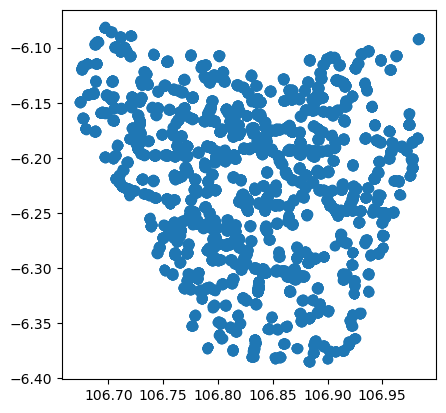

In [1]:
import geopandas as gpd
import pandas as pd

# Load Petrol Pump Data (Shapefile)
petrol_pumps = gpd.read_file(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Petrol_Station\Petrol_Station\petrol_station_jakarta.shp")

# Load Probe Data (Shapefile or GeoJSONL)
probe_data = gpd.read_file(r"C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\IDN_Q223_May23_Jakarta\Probe.shp")

# Ensure Both Have the Same CRS
petrol_pumps = petrol_pumps.to_crs(epsg=4326)  
probe_data = probe_data.to_crs(epsg=4326)

# Create a Buffer Around Petrol Pumps (100 meters = ~0.001 degrees)
petrol_pumps["buffer"] = petrol_pumps.geometry.buffer(0.001)  

# Convert Petrol Pumps to a New GeoDataFrame with Buffers
pumps_buffered = gpd.GeoDataFrame(petrol_pumps, geometry="buffer")

# Spatial Join: Find Probes Inside the Buffers
merged_data = gpd.sjoin(probe_data, pumps_buffered, how="inner", predicate="within")

# Save Merged Data
#merged_data.to_file("merged_pumps_probes.geojson", driver="GeoJSON")

# Display First Few Rows
print(merged_data.head())

# Quick Plot
merged_data.plot()


In [2]:
merged_data.shape

(20551, 9)

In [3]:
import geopandas as gpd
import plotly.express as px

# Assuming your DataFrame is called `merged_data`
# Extract Latitude and Longitude for Probes (Left Data)
merged_data["probe_lat"] = merged_data["geometry"].y
merged_data["probe_lon"] = merged_data["geometry"].x

# Extract Latitude and Longitude for Petrol Pumps (Right Data)
merged_data["pump_lat"] = merged_data["geometry_right"].y
merged_data["pump_lon"] = merged_data["geometry_right"].x

# Create a column to identify point type
merged_data["type"] = "Probe"
pumps_data = merged_data.drop_duplicates(subset=["pump_lat", "pump_lon"]).copy()
pumps_data["type"] = "Petrol Pump"

# Concatenate both for visualization
combined_data = pd.concat([merged_data[["probe_lat", "probe_lon", "type"]], 
                           pumps_data[["pump_lat", "pump_lon", "type"]].rename(columns={"pump_lat": "probe_lat", "pump_lon": "probe_lon"})])

# Plot using Plotly
fig = px.scatter_mapbox(
    combined_data,
    lat="probe_lat",
    lon="probe_lon",
    color="type",
    zoom=10,
    mapbox_style="carto-positron",
    title="Petrol Pumps & Probes Visualization"
)

# Show the Plot
fig.show()


## Correlation Analysis 

In [15]:
import geopandas as gpd
roads_gdf = gpd.read_file(r'C:\Users\Sejal Hanmante\Downloads\Data_for_hackathon\Data_for_hackathon\Stale_Petrol_station\Petrol_Station\Petrol_Station\road.shp')
roads_gdf

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4705040,5113,primary,Jalan Pasar Senen,None,F,0,0,F,F,"LINESTRING (106.84182 -6.17814, 106.84183 -6.1..."
1,4705043,5115,tertiary,Jalan Gunung Sahari III,None,F,0,0,F,F,"LINESTRING (106.84233 -6.16781, 106.84172 -6.1..."
2,4705045,5114,secondary,Jalan Kesenian,None,F,0,0,F,F,"LINESTRING (106.83521 -6.16675, 106.83529 -6.1..."
3,4705046,5115,tertiary,Jalan Budi Utomo,None,F,0,0,F,F,"LINESTRING (106.83822 -6.16692, 106.83803 -6.1..."
4,8151584,5114,secondary,Jalan Lapangan Banteng Utara,None,F,0,0,F,F,"LINESTRING (106.83576 -6.1683, 106.83574 -6.16..."
...,...,...,...,...,...,...,...,...,...,...,...
346945,1361441110,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97556 -6.22506, 106.9757 -6.2248)"
346946,1361441111,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97613 -6.22492, 106.97611 -6.2..."
346947,1361451077,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.93605 -6.26778, 106.93605 -6.2..."
346948,1361451078,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.9362 -6.26914, 106.93635 -6.26..."


In [16]:
import geopandas as gpd
import pandas as pd


# Function to extract bounding box (min/max values)
def get_bbox(geometry):
    x_coords, y_coords = zip(*geometry.coords)  # Extract x (longitude) and y (latitude) values
    return min(x_coords), max(x_coords), min(y_coords), max(y_coords)

# Apply function to each road segment
roads_gdf[["min_lon", "max_lon", "min_lat", "max_lat"]] = roads_gdf["geometry"].apply(lambda line: pd.Series(get_bbox(line)))


In [18]:
roads_gdf

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,min_lon,max_lon,min_lat,max_lat
0,4705040,5113,primary,Jalan Pasar Senen,None,F,0,0,F,F,"LINESTRING (106.84182 -6.17814, 106.84183 -6.1...",106.841164,106.841842,-6.178135,-6.174576
1,4705043,5115,tertiary,Jalan Gunung Sahari III,None,F,0,0,F,F,"LINESTRING (106.84233 -6.16781, 106.84172 -6.1...",106.839684,106.842329,-6.168018,-6.167812
2,4705045,5114,secondary,Jalan Kesenian,None,F,0,0,F,F,"LINESTRING (106.83521 -6.16675, 106.83529 -6.1...",106.835209,106.835716,-6.167981,-6.166748
3,4705046,5115,tertiary,Jalan Budi Utomo,None,F,0,0,F,F,"LINESTRING (106.83822 -6.16692, 106.83803 -6.1...",106.835781,106.838221,-6.168235,-6.166919
4,8151584,5114,secondary,Jalan Lapangan Banteng Utara,None,F,0,0,F,F,"LINESTRING (106.83576 -6.1683, 106.83574 -6.16...",106.833209,106.835765,-6.169636,-6.168296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346945,1361441110,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97556 -6.22506, 106.9757 -6.2248)",106.975564,106.975702,-6.225059,-6.224802
346946,1361441111,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97613 -6.22492, 106.97611 -6.2...",106.975426,106.976134,-6.224925,-6.224693
346947,1361451077,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.93605 -6.26778, 106.93605 -6.2...",106.935790,106.936053,-6.267785,-6.267557
346948,1361451078,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.9362 -6.26914, 106.93635 -6.26...",106.936195,106.936353,-6.269137,-6.268490


In [28]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString



# Vectorized function to compute min/max longitude & latitude
def get_min_max_bounds(line):
    x_coords, y_coords = zip(*line.coords)  # Extract x (longitude) and y (latitude)
    return (min(x_coords), max(x_coords)), (min(y_coords), max(y_coords))

# Apply function efficiently
roads_gdf[['lon_range', 'lat_range']] = roads_gdf['geometry'].apply(
    lambda line: pd.Series(get_min_max_bounds(line))
)

# Display results
print(roads_gdf)


            osm_id  code         fclass                          name   ref  \
0          4705040  5113        primary             Jalan Pasar Senen  None   
1          4705043  5115       tertiary       Jalan Gunung Sahari III  None   
2          4705045  5114      secondary                Jalan Kesenian  None   
3          4705046  5115       tertiary              Jalan Budi Utomo  None   
4          8151584  5114      secondary  Jalan Lapangan Banteng Utara  None   
...            ...   ...            ...                           ...   ...   
346945  1361441110  5123  living_street                          None  None   
346946  1361441111  5123  living_street                          None  None   
346947  1361451077  5123  living_street                          None  None   
346948  1361451078  5123  living_street                          None  None   
346949  1361466770  5123  living_street                          None  None   

       oneway  maxspeed  layer bridge tunnel  \
0  

In [29]:
roads_gdf

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,min_lon,max_lon,min_lat,max_lat,lon_range,lat_range
0,4705040,5113,primary,Jalan Pasar Senen,None,F,0,0,F,F,"LINESTRING (106.84182 -6.17814, 106.84183 -6.1...",106.841164,106.841842,-6.178135,-6.174576,"(106.8411641, 106.841842)","(-6.1781352, -6.1745764)"
1,4705043,5115,tertiary,Jalan Gunung Sahari III,None,F,0,0,F,F,"LINESTRING (106.84233 -6.16781, 106.84172 -6.1...",106.839684,106.842329,-6.168018,-6.167812,"(106.8396842, 106.8423287)","(-6.1680183, -6.167812)"
2,4705045,5114,secondary,Jalan Kesenian,None,F,0,0,F,F,"LINESTRING (106.83521 -6.16675, 106.83529 -6.1...",106.835209,106.835716,-6.167981,-6.166748,"(106.8352088, 106.8357159)","(-6.1679814, -6.1667483)"
3,4705046,5115,tertiary,Jalan Budi Utomo,None,F,0,0,F,F,"LINESTRING (106.83822 -6.16692, 106.83803 -6.1...",106.835781,106.838221,-6.168235,-6.166919,"(106.8357807, 106.8382207)","(-6.1682354, -6.1669185)"
4,8151584,5114,secondary,Jalan Lapangan Banteng Utara,None,F,0,0,F,F,"LINESTRING (106.83576 -6.1683, 106.83574 -6.16...",106.833209,106.835765,-6.169636,-6.168296,"(106.8332093, 106.8357649)","(-6.1696364, -6.1682958)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346945,1361441110,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97556 -6.22506, 106.9757 -6.2248)",106.975564,106.975702,-6.225059,-6.224802,"(106.9755644, 106.9757016)","(-6.2250592, -6.2248019)"
346946,1361441111,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.97613 -6.22492, 106.97611 -6.2...",106.975426,106.976134,-6.224925,-6.224693,"(106.9754256, 106.976134)","(-6.2249249, -6.2246933)"
346947,1361451077,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.93605 -6.26778, 106.93605 -6.2...",106.935790,106.936053,-6.267785,-6.267557,"(106.9357896, 106.9360525)","(-6.2677848, -6.2675569)"
346948,1361451078,5123,living_street,None,None,B,0,0,F,F,"LINESTRING (106.9362 -6.26914, 106.93635 -6.26...",106.936195,106.936353,-6.269137,-6.268490,"(106.9361955, 106.9363535)","(-6.2691371, -6.2684901)"


In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px




# Ensure all datasets have the same CRS
common_crs = "EPSG:4326"  # WGS 84 (Change if needed)
petrol_pumps_gdf = petrol_pumps_gdf.to_crs(common_crs)
probes_gdf = probes_gdf.to_crs(common_crs)
roads_gdf = roads_gdf.to_crs(common_crs)

# Merge Probe Data & Petrol Pumps (Already Done)
merged_gdf = probes_gdf  # Assuming probes_gdf already has nearest petrol stations merged

# Spatially Join Roads with Merged Data (Probes + Petrol Pumps)
merged_gdf = gpd.sjoin(merged_gdf, roads_gdf, how="left", predicate="intersects")

# Plot using Plotly
fig = px.scatter_mapbox(
    merged_gdf,
    lat=merged_gdf.geometry.y,
    lon=merged_gdf.geometry.x,
    color="source",  # Differentiate between probes & petrol pumps
    zoom=12,
    mapbox_style="open-street-map",
    title="Visualization of Roads, Petrol Pumps, and Probes"
)

# Add road network as lines
for _, row in roads_gdf.iterrows():
    line = row["geometry"]
    lon, lat = line.xy
    fig.add_trace(px.line_mapbox(pd.DataFrame({'lon': lon, 'lat': lat}), lon='lon', lat='lat'))

fig.show()


In [42]:
pip install pyspark apache-sedona geopandas shapely fiona


Note: you may need to restart the kernel to use updated packages.Collecting pyspark
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta 0:36:09
     -------------------------------------- 0.0/317.3 MB 146.3 kB/s eta

In [44]:
import geopandas as gpd
import folium

# Load the merged GeoJSONL file
file_path = r"C:\Users\Sejal Hanmante\Documents\roadpetrolmerged.geojsonl"
gdf = gpd.read_file(file_path, driver="GeoJSONSeq")  # GeoJSONL = GeoJSONSeq

# Convert CRS to WGS84 (Latitude, Longitude) if needed
if gdf.crs and gdf.crs.to_string() != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

# Create a folium map centered on the first petrol station
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add petrol stations and roads to the map
for _, row in gdf.iterrows():
    if row.geometry.geom_type == "Point":  # Petrol Stations
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row.get("name", "Petrol Station"),
            icon=folium.Icon(color="red", icon="cloud"),
        ).add_to(m)
    elif row.geometry.geom_type in ["LineString", "MultiLineString"]:  # Roads
        folium.PolyLine(
            locations=[(lat, lon) for lon, lat in row.geometry.coords],
            color="blue",
            weight=3,
            opacity=0.7,
            popup=row.get("name", "Road"),
        ).add_to(m)

# Save map as HTML
m.save("merged_map.html")
print("Map saved as merged_map.html. Open in a browser to view.")


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_1704\1589012622.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Map saved as merged_map.html. Open in a browser to view.


In [45]:
gdf 

,placeid,name,displaylat,displaylon,osm_id,code,fclass,name_2,ref,oneway,...,layer,bridge,tunnel,n,distance,feature_x,feature_y,nearest_x,nearest_y,geometry
0,1,Pertamina,-6.145160,106.894510,676178420,5114,secondary,Jalan Artha Gading Boulevard,None,F,...,0,F,F,1,0.000011,106.894510,-6.145160,106.894515,-6.145151,POINT (106.89451 -6.14516)
1,2,Shell,-6.126501,106.787652,974281317,5141,service,None,None,B,...,0,F,F,1,0.000029,106.787652,-6.126501,106.787657,-6.126472,POINT (106.78765 -6.1265)
2,3,Pertamina,-6.202623,106.806137,594542422,5141,service,SPBU Pertamina 34-10201,None,F,...,0,F,F,1,0.000095,106.806137,-6.202623,106.806068,-6.202558,POINT (106.80614 -6.20262)
3,4,Pertamina,-6.311140,106.771830,809412742,5122,residential,None,None,B,...,0,F,F,1,0.000314,106.771830,-6.311140,106.772141,-6.311182,POINT (106.77183 -6.31114)
4,5,Mandiri Motor,-6.197810,106.769170,684490680,5113,primary,Jalan Panjang Raya,None,F,...,0,F,F,1,0.000113,106.769170,-6.197810,106.769057,-6.197815,POINT (106.76917 -6.19781)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,684,Pertamina,-6.246070,106.905860,1286384245,5113,primary,Jalan Laksamana Malahayati,None,F,...,0,F,F,1,0.000082,106.905860,-6.246070,106.905849,-6.246151,POINT (106.90586 -6.24607)
690,685,Shell,-6.147098,106.702235,1312023733,5141,service,None,None,F,...,0,F,F,1,0.000119,106.702235,-6.147098,106.702355,-6.147098,POINT (106.70224 -6.1471)
691,686,Shell,-6.219444,106.778801,761832571,5113,primary,Jalan Letnan Jenderal Soepeno,None,F,...,0,F,F,1,0.000220,106.778801,-6.219444,106.778898,-6.219247,POINT (106.7788 -6.21944)
692,687,Pertamina,-6.212371,106.900240,1041358228,5141,service,None,None,F,...,0,F,F,1,0.000080,106.900240,-6.212371,106.900246,-6.212291,POINT (106.90024 -6.21237)
